# 5310 Assignment 2 
- Name:Tommy          SID: 450186176      Unikey:Tomm6443；
- Name:YingXuan Guo     SID: 500621349      Unikey:yguo4029

## The data is about bike sharing from 2011.1.1 to 2012.12.31

### Attributes

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :  Clear, Few clouds, Partly cloudy, Partly cloudy
- temp: Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius. 
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
- Count_Wk: sum of each weekday cnt
- Sum_Wk: sum of each weekday number
- cnt_Wk: average of cnt in every weekdays

## Import Libraries

In [1]:
import csv
import pprint
from fancyimpute import KNN
import numpy as np
import scipy
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydot
import graphviz
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing,metrics,linear_model

## Read the bike sharing data

Which columns contained letter data? We need to convert these to numeric types. Here we replace values that can't be converted with NaN (not a number).

In [2]:
bike = list(csv.DictReader(open('5310 Assignment.csv',encoding='utf-8')))
pprint.pprint(bike[0])

{'atemp': '0.363625',
 'casual': '331',
 'cnt': '985',
 'dteday': '1/01/2011',
 'holiday': 'No',
 'hum': '0.805833',
 'instant': '1',
 'mnth': 'January',
 'registered': '654',
 'season': 'Spring',
 'temp': '0.344167',
 'weathersit': 'Misty',
 'weekday': 'Saturday',
 'windspeed': '0.160446',
 'workingday': 'No',
 'yr': '0'}


In [3]:
bike=pd.read_csv("5310 Assignment.csv")
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2011,Spring,0,January,No,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/01/2011,Spring,0,January,No,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/01/2011,Spring,0,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/01/2011,Spring,0,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/01/2011,Spring,0,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,6/01/2011,Spring,0,January,No,Thursday,Yes,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,7/01/2011,Spring,0,January,No,Friday,Yes,Misty,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,8/01/2011,Spring,0,January,No,Saturday,No,Misty,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,9/01/2011,Spring,0,January,No,Sunday,No,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10/01/2011,Spring,0,January,No,Monday,Yes,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
bike.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
bike.shape

(731, 16)

## clean data

In [6]:
bike.replace("Spring",1,inplace=True)
bike.replace("Summer",2,inplace=True)
bike.replace("Autumn",3,inplace=True)
bike.replace("Winter",4,inplace=True)



mnth = {'January':1, 'February':2, 'March':3,'April':4, 'May':5,
          'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

weekday = {'Monday':1, 'Tuesday':2, 'Wednesday':3,'Thursday':4, 'Friday':5,
          'Saturday':6, 'Sunday':7
 }

holiday  = {'Yes':1, 'No':0}

workingday = {'Yes':1, 'No':0}

weathersit = {'Clear':0,'Misty':1, 'Light rain':2}

bike["holiday"] = bike["holiday"].map(holiday)
bike["workingday"] = bike["workingday"].map(workingday)
bike["mnth"] = bike["mnth"].map(mnth)
bike["weekday"] = bike["weekday"].map(weekday)
bike["weathersit"] = bike["weathersit"].map(weathersit)

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2011,1,0,1,0,6,0,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/01/2011,1,0,1,0,7,0,1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/01/2011,1,0,1,0,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/01/2011,1,0,1,0,2,1,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/01/2011,1,0,1,0,3,1,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike.rename(columns={'instant':'rec_id','mnth':'month','hum':'humidity','yr':'year','dteday':'datetime','weathersit':'weather_condition',
                       'cnt':'users'},inplace=True)
bike.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,users
0,1,1/01/2011,1,0,1,0,6,0,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/01/2011,1,0,1,0,7,0,1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/01/2011,1,0,1,0,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/01/2011,1,0,1,0,2,1,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/01/2011,1,0,1,0,3,1,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike['year']=bike.year.astype('category')
bike['workingday']=bike.workingday.astype('category')
bike['holiday']=bike.holiday.astype('category')
bike['weekday']=bike.weekday.astype('category')
bike['season']=bike.season.astype('category')
bike['datetime']=pd.to_datetime(bike.datetime)
bike['month']=bike.month.astype('category')
bike['weather_condition']=bike.weather_condition.astype('category')

In [9]:
bike.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
users                0
dtype: int64

In [10]:
bike.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,users
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##  Visualization

In [11]:
Sum_Wk = [0,0,0,0,0,0,0]
Count_Wk = [0,0,0,0,0,0,0]
total_count_Wk = [0,0,0,0,0,0,0]
for i in range (0, 731):
    if bike['weekday'][i] == 1:
        Count_Wk[0] += bike ['users'][i]
        Sum_Wk[0]+=1
        total_count_Wk[0]=  Count_Wk[0]//Sum_Wk[0]
    elif bike['weekday'][i] == 2:
        Count_Wk[1] += bike ['users'][i]
        Sum_Wk[1]+=1
        total_count_Wk[1]=  Count_Wk[1]//Sum_Wk[1]
    elif bike['weekday'][i] == 3:
        Count_Wk[2] += bike ['users'][i]
        Sum_Wk[2]+=1
        total_count_Wk[2]=  Count_Wk[2]//Sum_Wk[2]
    elif bike['weekday'][i] == 4:
        Count_Wk[3] += bike ['users'][i]
        Sum_Wk[3]+=1
        total_count_Wk[3]=  Count_Wk[3]//Sum_Wk[3]
    elif bike['weekday'][i] == 5:
        Count_Wk[4] += bike ['users'][i]
        Sum_Wk[4]+=1
        total_count_Wk[4]=  Count_Wk[1]//Sum_Wk[4]
    elif bike['weekday'][i] == 6:
        Count_Wk[5] += bike ['users'][i]
        Sum_Wk[5]+=1
        total_count_Wk[5]=  Count_Wk[5]//Sum_Wk[5]
    elif bike['weekday'][i] == 7:
        Count_Wk[6] += bike ['users'][i]
        Sum_Wk[6]+=1
        total_count_Wk[6]=  Count_Wk[6]//Sum_Wk[6]

print(Count_Wk)
print(Sum_Wk)
print(total_count_Wk)

[455503, 469109, 473048, 485395, 487790, 477807, 444027]
[105, 104, 104, 104, 104, 105, 105]
[4338, 4510, 4548, 4667, 4510, 4550, 4228]


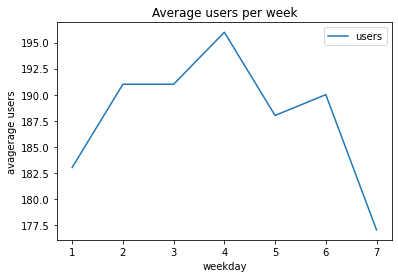

In [12]:
a = [1,2,3,4,5, 6, 7,]
b = [183, 191, 191, 196, 188, 190, 177]

plt.plot(a, b, label = 'users')
plt.xlabel('weekday')
plt.ylabel('avagerage users')
plt.title('Average users per week')
plt.legend() 

plt.plot()
plt.show()

In [13]:
Sum_sea = [0,0,0,0,]
Count_sea = [0,0,0,0]
total_count_sea = [0,0,0,0]
for i in range (0, 731):
    if bike['season'][i] == 1:
        Count_sea[0] += bike ['users'][i]
        Sum_sea[0]+=1
        total_count_sea[0]=  Count_sea[0]//Sum_sea[0]
    elif bike['season'][i] == 2:
        Count_sea[1] += bike ['users'][i]
        Sum_sea[1]+=1
        total_count_sea[1]=  Count_sea[1]//Sum_sea[1]
    elif bike['season'][i] == 3:
        Count_sea[2] += bike ['users'][i]
        Sum_sea[2]+=1
        total_count_sea[2]=  Count_sea[2]//Sum_sea[2]
    elif bike['season'][i] == 4:
        Count_sea[3] += bike ['users'][i]
        Sum_sea[3]+=1
        total_count_sea[3]=  Count_sea[3]//Sum_sea[3]


print(Count_sea)
print(Sum_sea)
print(total_count_sea)

[471348, 918589, 1061129, 841613]
[181, 184, 188, 178]
[2604, 4992, 5644, 4728]


####  we can see that more bike shares are rented in summer and autumn

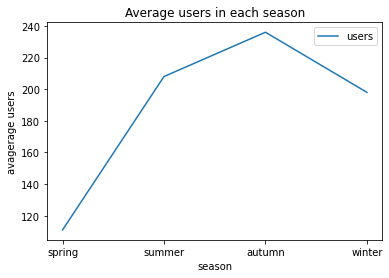

In [14]:
a = ['spring','summer','autumn','winter'] 
b = [111, 208, 236, 198]

plt.plot(a, b, label = 'users')
plt.xlabel('season')
plt.ylabel('avagerage users')
plt.title('Average users in each season')
plt.legend() 

plt.plot()
plt.show()

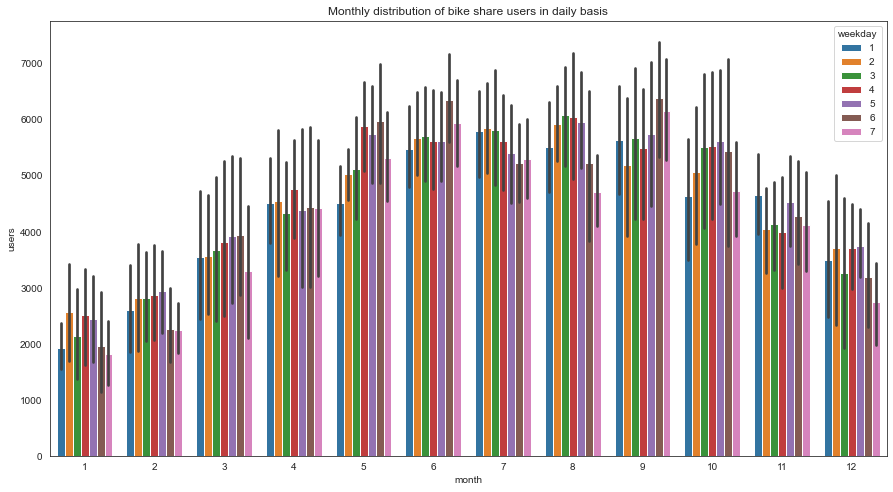

In [15]:
sns.set_style('white')
fig,weekday=plt.subplots(figsize=(15,8))
sns.barplot(y='users',x='month',data=bike[['month','users','weekday']],hue='weekday',ax=weekday)
weekday.set_title('Monthly distribution of bike share users in daily basis')
plt.show()

## Outlier Analysis

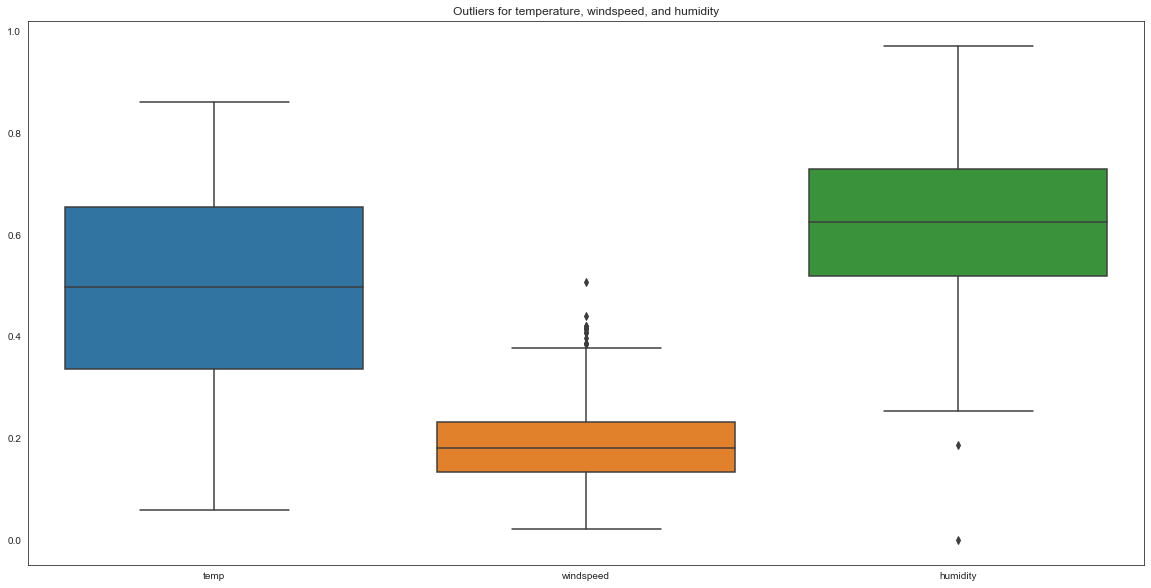

In [16]:
boxplot,twh=plt.subplots(figsize=(20,10))
twh.set_title('Outliers for temperature, windspeed, and humidity')
sns.boxplot(data=bike[['temp','windspeed','humidity']])
plt.show()

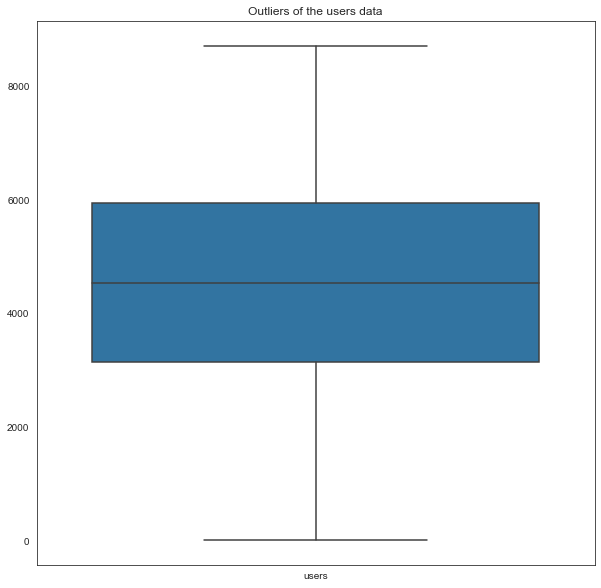

In [17]:
boxplot,usersoutliers=plt.subplots(figsize=(10,10))
usersoutliers.set_title('Outliers of the users data')
sns.boxplot(data=bike[['users']])
plt.show()

### Impute and Replace Outliers

In [18]:
whtitle=['windspeed','humidity']       
wh=pd.DataFrame(bike,columns=['windspeed','humidity'])
                      
for i in whtitle:
    wh1,wh2=np.percentile(wh.loc[:,i],[75,25])
    interquartilerange=wh1-wh2
    max=wh1+(interquartilerange*1.5)
    wh.loc[wh.loc[:,i]>max,:i]=np.nan
    min=wh2-(interquartilerange*1.5)
    wh.loc[wh.loc[:,i]<min,:i]=np.nan
wh['humidity']=wh['humidity'].fillna(wh['humidity'].mean())
bike['humidity']=bike['humidity'].replace(wh['humidity'])
wh['windspeed']=wh['windspeed'].fillna(wh['windspeed'].mean())
bike['windspeed']=bike['windspeed'].replace(wh['windspeed'])

### Plot for Normal Probability

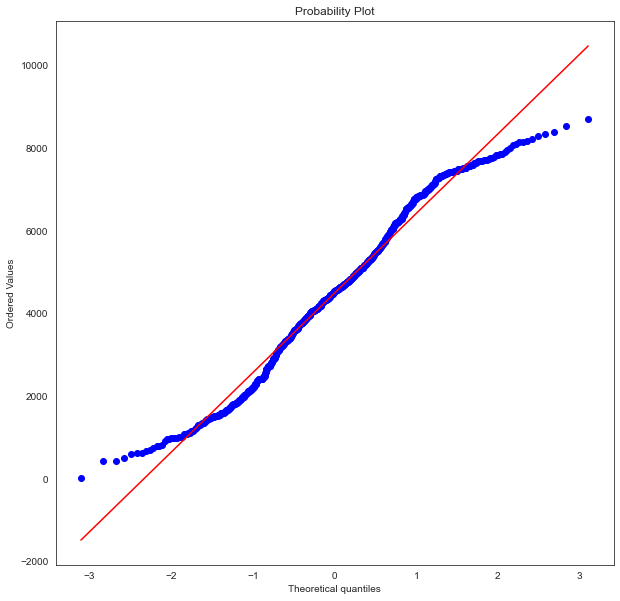

In [19]:
fig=plt.figure(figsize=(10,10))
stats.probplot(bike.users.tolist(),plot=plt)
plt.show()

### Correlation Matrix

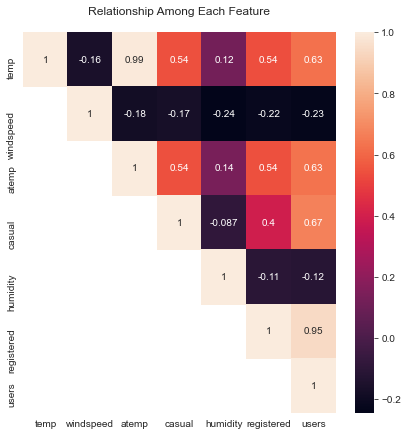

In [20]:
fig,cor=plt.subplots(figsize=(7,7))
relmt=bike[['temp','windspeed','atemp','casual','humidity','registered','users']].corr()
bike_matrix=np.array(relmt)
cor.set_title('Relationship Among Each Feature\n')
bike_matrix[np.triu_indices_from(bike_matrix)]=False
sns.heatmap(relmt,annot=True,mask=bike_matrix,)
plt.show()

### Dataset Modelling
This involves splitting dataset into 70:30 ratio and splitting the attributes in qualitative and quantitative types

In [21]:
train_data,test_data,train_label,test_label=train_test_split(bike.iloc[:,0:-3],bike.iloc[:,-1],test_size=0.3, random_state=42)
test_label=test_label.reset_index()
train_label=train_label.reset_index()
test_data.reset_index(inplace=True)
train_data.reset_index(inplace=True)

In [22]:
quantitative_features=['weekday','month','windspeed','temp','humidity']
qualitative_features=['holiday','year','workingday','season','weather_condition']
features_for_test=test_data[['weekday','month','humidity','holiday','season','temp','year','weather_condition','workingday','windspeed']]
features_for_train=train_data[['weekday','month','humidity','holiday','season','temp','year','weather_condition','workingday','windspeed']]
encoded_features_for_train=pd.get_dummies(features_for_train,columns=qualitative_features)
print('Size of the new data:',encoded_features_for_train.shape)

Size of the new data: (511, 18)


In [23]:
train_label=train_label.users.values
train_data=encoded_features_for_train

## Linear Regression

In [24]:
linreg=linear_model.LinearRegression()
linreg

LinearRegression()

#### R-Squared Score

In [26]:
linreg.fit(train_data,train_label)
linreg_accuracy=linreg.score(train_data,train_label)
print('Linear regression r-squared :',round(linreg_accuracy,5)*100,'%')

Linear regression r-squared : 81.136 %


#### Cross Validation

In [27]:
pred=cross_val_predict(linreg,train_data,train_label,cv=3)

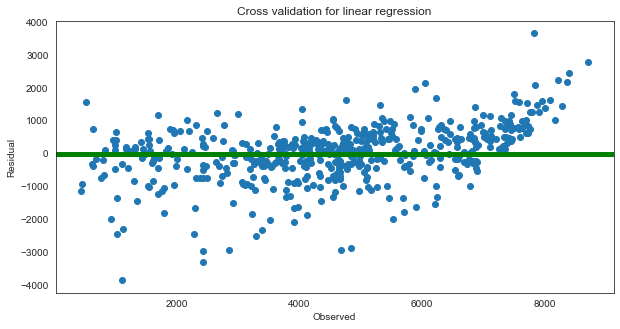

In [47]:
fig,_=plt.subplots(figsize=(10,5))
_ = plt.scatter(train_label,train_label-pred)
_ = plt.title('Cross validation for linear regression')
_ = plt.axhline(lw=5,color='green')
_ = plt.xlabel('Observed')
_ = plt.ylabel('Residual')
plt.show()

#### Evaluation Metrics Used:
Cross validation, mean squared error, and root mean square error

In [33]:
rsquared_linreg = cross_val_score(linreg, train_data, train_label, cv=3)
print('Result for Linear Regression 3-fold Cross Validation :',round(np.average(rsquared_linreg),5)*100,'%')

Result for Linear Regression 3-fold Cross Validation : 79.5 %


In [34]:
encoded_features_for_test=pd.get_dummies(features_for_test,columns=qualitative_features)
print('Shape of transformed dataframe :',encoded_features_for_test.shape)

Shape of transformed dataframe : (220, 18)


In [35]:
test_data=encoded_features_for_test
test_label=test_label.users.values

In [36]:
pred_linreg=linreg.predict(test_data)

In [37]:
linreg_meanabsoluteerror=metrics.mean_absolute_error(test_label,pred_linreg)
linreg_meansquareerror=math.sqrt(metrics.mean_squared_error(test_label,pred_linreg))

print('Linear regression mean absolute error :',round(linreg_meanabsoluteerror,2))
print('Linear regression Root mean square error :',round(linreg_meansquareerror,2))

Linear regression mean absolute error : 599.52
Linear regression Root mean square error : 790.48


#### Residual

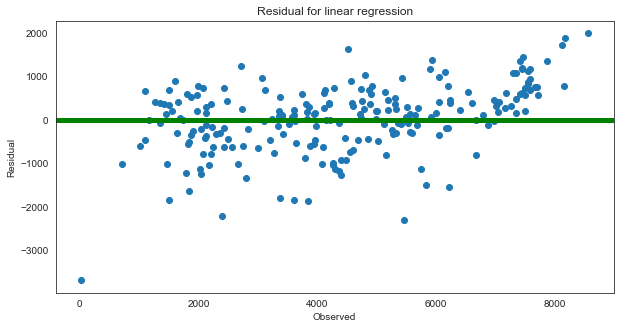

In [46]:
linreg_residual = test_label-pred_linreg
fig,a=plt.subplots(figsize=(10,5))
a = plt.scatter(test_label,linreg_residual)
a = plt.title('Residual for linear regression')
a = plt.axhline(lw=5,color='green')
a = plt.xlabel('Observed')
a = plt.ylabel('Residual')
plt.show()

## Decision Tree Regression

In [40]:
dectree=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)
dectree.fit(train_data,train_label)

DecisionTreeRegressor(max_leaf_nodes=10)

#### R-Squared Score

In [41]:
dectree_accuracy=dectree.score(train_data,train_label)
print('Decision Tree r-squared :',round(dectree_accuracy,5)*100,'%')

Decision Tree r-squared : 80.822 %


#### Decision tree plot

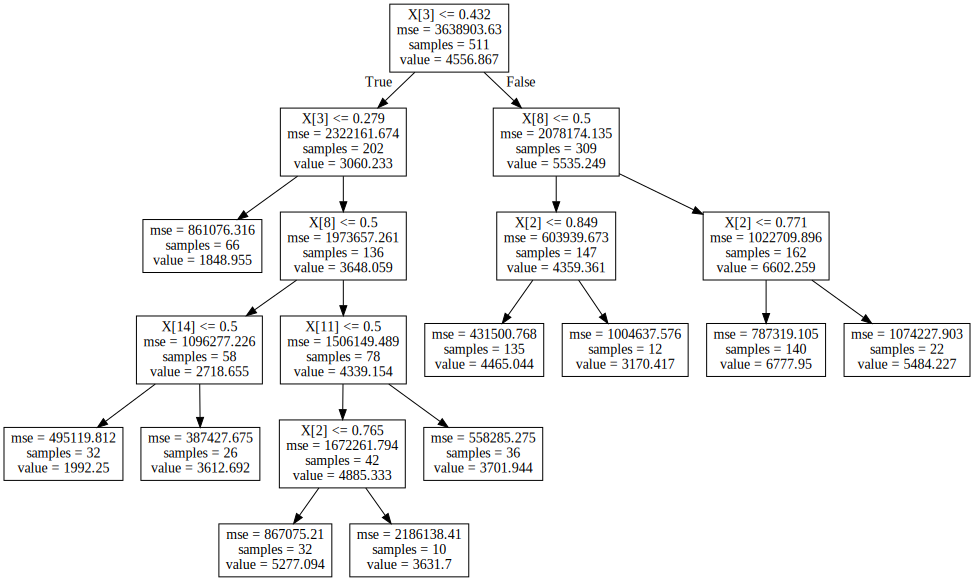

In [42]:
dectree_diagram = tree.export_graphviz(dectree, out_file=None) 
graph = graphviz.Source(dectree_diagram)
graph

#### Cross Validation

In [43]:
pred_dectree=cross_val_predict(dectree,train_data,train_label,cv=3)

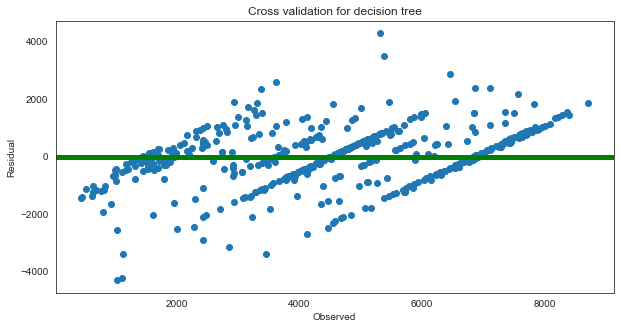

In [48]:
fig,b=plt.subplots(figsize=(10,5))
b = plt.scatter(train_label,train_label-pred_dectree)
b = plt.title('Cross validation for decision tree')
b = plt.axhline(lw=5,color='green')
b = plt.xlabel('Observed')
b = plt.ylabel('Residual')
plt.show()

#### Evaluation Metrics Used:
Cross validation, mean squared error, and root mean square error

In [50]:
rsquared_dectree = cross_val_score(dectree, train_data, train_label, cv=3)
print('Result for Decision Tree 3-fold Cross Validation :',round(np.average(rsquared_dectree),5)*100,'%')

Result for Decision Tree 3-fold Cross Validation : 72.941 %


In [51]:
pred_dectree=dectree.predict(test_data)

In [52]:
dectree_meanabsoluteerror=metrics.mean_absolute_error(test_label,pred_dectree)
dectree_meansquareerror=math.sqrt(metrics.mean_squared_error(test_label,pred_dectree))

print('Mean absolute error for decision tree :',round(dectree_meanabsoluteerror,2))
print('Root mean square error for decision tree :',round(dectree_meansquareerror,2))

Mean absolute error for decision tree : 667.82
Root mean square error for decision tree : 925.8


#### Residual

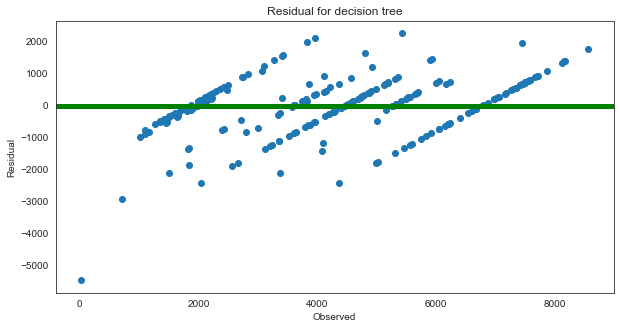

In [53]:
fig,c=plt.subplots(figsize=(10,5))
c = plt.scatter(test_label, test_label-pred_dectree)
c = plt.title('Residual for decision tree')
c = plt.axhline(lw=5,color='green')
c = plt.xlabel('Observed')
c = plt.ylabel('Residual')
plt.show()

## Random Forest Regression

In [54]:
ranfor=RandomForestRegressor(n_estimators=200)
ranfor.fit(train_data,train_label)

RandomForestRegressor(n_estimators=200)

#### R-Squared Score

In [55]:
ranfor_accuracy =ranfor.score(train_data,train_label)
print('Random forest r-squared :',round(ranfor_accuracy,5)*100,'%')

Random forest r-squared : 97.976 %


#### Cross Validation

In [56]:
pred_ranfor=cross_val_predict(ranfor,train_data,train_label,cv=3)

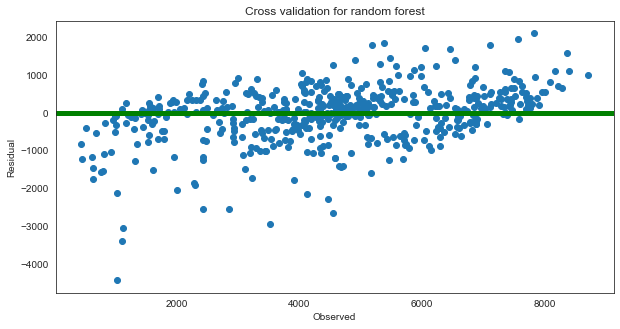

In [59]:
ranfor_residual = train_label-pred_ranfor
fig,d=plt.subplots(figsize=(10,5))
d = plt.scatter(train_label,ranfor_residual)
d = plt.title('Cross validation for random forest')
d = plt.axhline(lw=5,color='green')
d = plt.xlabel('Observed')
d = plt.ylabel('Residual')
plt.show()

#### Evaluation Metrics Used:
Cross validation, mean squared error, and root mean square error

In [60]:
rsquared_ranfor = cross_val_score(ranfor, train_data, train_label, cv=3)
print('Result for Random forest 3-fold Cross Validation:',round(np.average(rsquared_ranfor),5)*100,'%')

Result for Random forest 3-fold Cross Validation: 84.53 %


In [61]:
pred_ranfor=ranfor.predict(test_data)

In [62]:
ranfor_meanabsoluteerror=metrics.mean_absolute_error(test_label,pred_ranfor)
ranfor_meansquareerror=math.sqrt(metrics.mean_squared_error(test_label,pred_ranfor))

print('Mean absolute error for random forest :',round(ranfor_meanabsoluteerror,2))
print('Root mean square error for random forest :',round(ranfor_meansquareerror,2))

Mean absolute error for random forest : 425.47
Root mean square error for random forest : 637.6


#### Residual

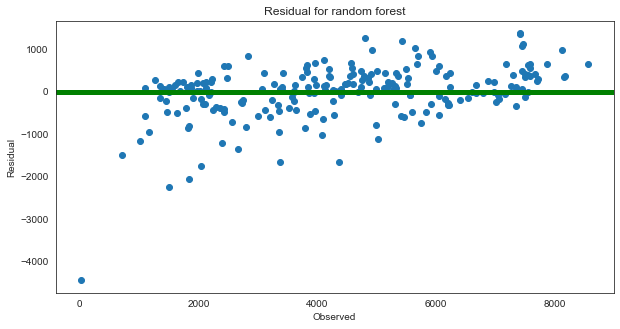

In [63]:
fig,e=plt.subplots(figsize=(10,5))
e = plt.scatter(test_label,test_label-pred_ranfor)
e = plt.title('Residual for random forest')
e = plt.axhline(lw=5,color='green')
e = plt.xlabel('Observed')
e = plt.ylabel('Residual')
plt.show()

### Final Prediction Output for Bike Sharing Demand in Daily Basis
Because random forest is the best algorithm based on several evaluation metrics, hence, the output prediction is created based on random forest algorithm

In [64]:
Randomforestprediction_output=pd.DataFrame(pred_ranfor,columns=["Random forest predictions"])
test_label_output=pd.DataFrame(test_label,columns=['test label'])
Bike_predictions=pd.merge(test_label_output,Randomforestprediction_output,left_index=True,right_index=True)
Bike_predictions.to_csv('Predicted data 5310 assignment 2.csv')
Bike_predictions

,test label,Random forest predictions
0,6606,6611.405
1,1550,1520.460
2,3747,3394.735
3,6041,5427.160
4,7538,7549.065
...,...,...
215,2659,4015.480
216,7338,7225.270
217,6978,6758.850
218,4795,3515.810


#### Predicted average users in daily basis

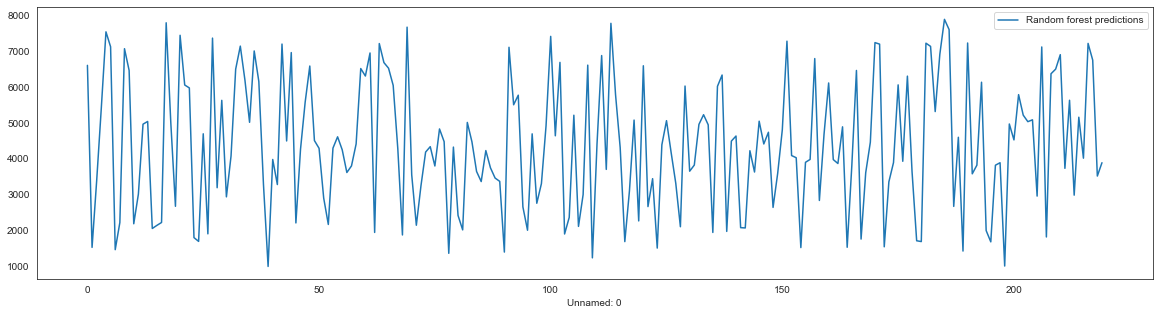

In [65]:
bike_pred=pd.read_csv("Predicted data 5310 assignment 2.csv")
bike_pred.plot("Unnamed: 0","Random forest predictions",figsize=(20,5))
plt.show()

#### Predicted average users in seasonal basis

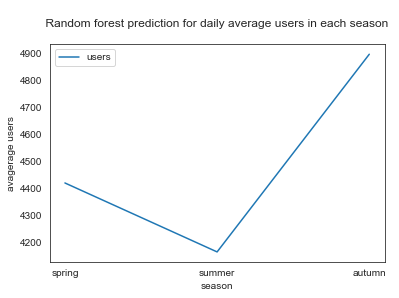

In [66]:
a = ['spring','summer','autumn'] 
b = [4420, 4165, 4896]

plt.plot(a, b, label = 'users')
plt.xlabel('season')
plt.ylabel('avagerage users')
plt.title('\n Random forest prediction for daily average users in each season \n')
plt.legend() 

plt.plot()
plt.show()